In [1]:
import torch
import torch
import torch.nn as nn
import argparse
import torch.optim as optim
import numpy as np

import time
import matplotlib.pyplot as plt
import random

import torch.nn as nn
import argparse
import torch.optim as optim
import numpy as np
import time
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from torchdiffeq import odeint_adjoint as odeint
from mpl_toolkits.mplot3d import Axes3D
import random



# class Args:
#     def __init__(self):
#         pass 
#     def assign(self,args):
#         for key, val in args.items():
#             if key != 'self':
#                 setattr(self, key, val)
scaler = MinMaxScaler()

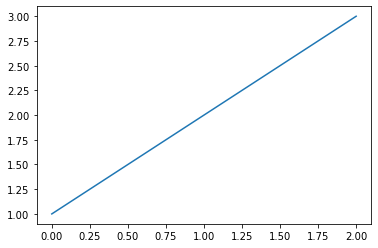

In [2]:
fig = plt.figure()
plt.plot([1,2,3])
fig.savefig("delete_this_fig")

In [3]:
from sklearn.preprocessing import StandardScaler
StandardScaler()

StandardScaler()

In [10]:
class F_Gen:
    def __init__(self):
        self.sin = torch.sin
        self.cos = torch.cos
        self.sin_cos = lambda t: self.sin(t)*self.cos(t)
        self.exp = lambda t: torch.exp(-t)
    
    
    def realize(self):
        
        
        f = np.random.choice([self.sin, self.cos, self.sin_cos])

        alpha = torch.rand(1) * 5
        omega = torch.rand(1) * 5
        h = torch.rand(1)
        k = torch.rand(1) * 5
        
        def force(t, f, alpha, omega, h, k):
            return alpha * f(omega *t - h) + k


        return lambda t: force(t, f, alpha, omega, h, k)
    
    def realize_recursive(self, high = 6):
        num_repeats = torch.randint(1, 5, (1,))
        f_lst = []
        for i in range(num_repeats):
            f_lst.append(self.realize())
        return lambda t: torch.tensor([f(t).numpy() for f in f_lst], dtype = torch.float32).sum(axis = 0)
    
class Exp_Gen(F_Gen):
    #def __init__(self):
        
    
    def realize(self):
        quadratic = lambda t: t**2
        sqrt = lambda t: t**0.5
        #inv = lambda t: 1/t
        cos = lambda t: torch.cos(t)
        sin = lambda t: torch.sin(t)
        
        alpha = torch.rand(1) * 3
        beta = torch.rand(1) * 3
        
        f = np.random.choice([sin, cos, sqrt, quadratic])
        
        
        func = lambda t: alpha * torch.exp(-torch.abs(f(t)))
        return func
        
        

In [13]:
import torch
import numpy as np


class F_Gen:
    def __init__(self, force_bias = False):
        self.force_bias = force_bias
        self.sin = torch.sin
        self.cos = torch.cos
        self.exp = lambda t: self.exp(-t)
        self.sin_cos = lambda t: self.sin(t)*self.cos(t)
        self.sin2 = lambda t: self.sin(t)*self.sin(t)
        self.cos2 = lambda t: self.cos(t)*self.cos(t)

    def realize(self):
    	pass

    def realize_recursive(self, high = 6):
    	with torch.no_grad():
	        num_repeats = torch.randint(1, 5, (1,))
	        f_lst = []
	        for i in range(num_repeats):
	            f_lst.append(self.realize())

	        if self.force_bias:
	            #bias = float(np.sign(torch.rand(1)-0.5))*bias
	            bias = (torch.rand(1) -0.5) * 2 * self.force_bias

	            b_lst = [bias]
	            b_lst = b_lst +[0]*(num_repeats -1)
	        return lambda t: torch.tensor([f(t).detach().numpy() for i, f in enumerate(f_lst)], dtype = torch.float32).sum(axis = 0)

class Wave_Gen(F_Gen):
    def __init__(self, phase_shift = 2*np.pi, amplitude_range = 5, angular_freq_range = 3, force_bias = False):
        
        super().__init__(force_bias)

        self.phi_shift = phase_shift
        self.a_range = amplitude_range
        self.w_range = angular_freq_range
    
    
    def realize(self):
        
        f = np.random.choice([self.sin, self.cos, self.sin_cos])

        alpha = torch.rand(1) * self.a_range
        omega = torch.rand(1) * self.w_range
        phi = torch.rand(1) * self.phi_shift

        # if self.force_bias:
        #     k = torch.rand(1) * self.force_bias
        # else:
        #     k = 0
        
        def force(t, f, alpha, omega, phi):
            return alpha * f(omega *t + phi) #+ k


        return lambda t: force(t, f, alpha, omega, phi)
    
    

In [15]:
f_gen = Wave_Gen()
X = torch.rand(1000)
X = (X*10).sort().values

In [16]:
plt.figure(figsize = (14, 3))
for i in range(3):
    y = f_gen.realize()(X)
    print(y.shape)
    #plt.plot(X,y)

torch.Size([1000])
torch.Size([1000])
torch.Size([1000])


<Figure size 1008x216 with 0 Axes>

In [17]:
torch.rand(1) -0.5

tensor([-0.0692])

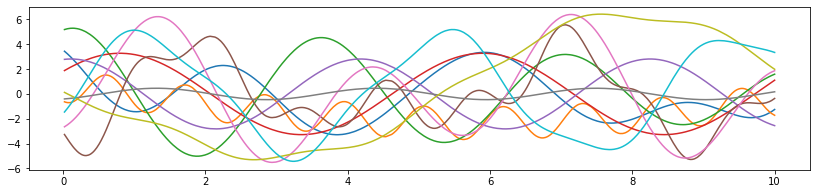

In [18]:
plt.figure(figsize = (14, 3))
for i in range(10):
    y = f_gen.realize_recursive()(X)
    plt.plot(X,y)

In [ ]:
plt.figure(figsize = (14, 3))
exp_gen = Exp_Gen()
for i in range(5):
    y = exp_gen.realize()(X)
    plt.plot(X,y)

In [ ]:
from platform import python_version

print(python_version())

In [ ]:
import transfer_ode as tode
ADJOINT = False
if ADJOINT:
    from torchdiffeq import odeint_adjoint as odeint
else:
    from torchdiffeq import odeint

In [ ]:
import types
def assign_args(args_):
    for arg, val in args_.items():
        fs = []
        for f in globals().values():
            if type(f) == types.FunctionType:
                #print(f)
                try:
                    #print(f.args)
                    f.args = args
                except:
                    fs.append(f)
                    
                    #print(f'f, {id(f)}')
        for f in fs:
            #print(f'f, {id(f)}')
            f.__globals__[arg] = val
                    #f.__globals__["NDIMZ"] = args.hidden_size
def assign_vars(func, key, val):
    func.__globals__[key] = val

In [ ]:
args

In [ ]:
# if args.viz:
#     import matplotlib.pyplot as plt

#     fig = plt.figure(figsize=(12, 4), facecolor='white')
#     ax_traj = fig.add_subplot(131, frameon=False)
#     ax_phase = fig.add_subplot(132, frameon=False)
#     ax_vecfield = fig.add_subplot(133, frameon=False)
#     plt.show(block=False)
# if __name__ == '__main__':
scaler = MinMaxScaler()
def optimize(a0 = lambda t: t**2,#-(5./t + t)#-3*t**2
             a1 = lambda t:1 + 0.*t,
             f = lambda t: torch.sin(t),#t**6#3*t**2#torch.sin(t)
             ics = torch.tensor(np.arange(-2.9, 2.9, 0.1), dtype = torch.float32),#torch.linspace(-7.,7.,200),
             method : str = "dopri5", 
             tmax : float = 5,
             #dt   : int   = 0.01,
             method_rc: str = "euler",
             wout : str = "analytic",
             paramg : str = "lin",
             niters : int = 100,
             hidden_size : int = 200,
             viz = False,#'store_false',
             gpu : int = 0,
             adjoint = 'store_false',
             random_sampling = True,
             n_timepoints = 50,
             regularization = 0,
             l1_reg_strength = 0,
             #visualize_ = False,
             niters_test: int =15000,
             num_bundles: int= 20,
             num_bundles_test : int =20,
             test_freq :int =10,
             evaluate_only : bool = False,
             bias_at_inference : bool = False,
             ffnn_bias: bool = False,
             force_bias : int  = 0
            ):
    args = Args()
    
    args.assign(locals())
    tode.args = args
    
    if args.wout == 'analytic':
        wout_gen = tode.Transformer_Analytic(regularization, bias_at_inference)
        #wout_gen = tode.Transformer_Analytic(a0, a1, f, regularization)
        
        
    
    dt=tmax/n_timepoints
    args.dt = dt
    
    if not random_sampling:
        t = torch.arange(0.,args.tmax,args.dt)
    else:
        t = torch.rand(n_timepoints) *tmax
        t = t.sort().values
    
    t = t.reshape(-1,1)
    
    #assign_vars(tode.compute_s_sdot, "t", t)
    assign_args({"t": t})
    
    
    globals()["args"] = args
    
    ii = 0
    NDIMZ = args.hidden_size
    # define coefficients as lambda functions, used for gt and wout_analytic
    # training differential equation

    #need to sample tuple of (a1,f,IC)
    # each column of Wouts defines a solution thus, each tuple defines a solution too


    f_train = [lambda t: torch.cos(t) + force_bias,
               lambda t: torch.cos(t) - force_bias,
               lambda t: torch.sin(t) - force_bias, 
               lambda t: torch.sin(t) + force_bias, 
               lambda t: torch.sin(t)* torch.cos(t) - force_bias,
               lambda t: torch.sin(t)* torch.cos(t) + force_bias]
    a0_train = [lambda t:t**2]
    r1 = -10.
    r2 = 10.
    true_y0 = (r2 - r1) * torch.rand(100) + r1
    t = torch.arange(0., args.tmax, args.dt).reshape(-1, 1)
    t.requires_grad = True

    # sample each parameter to build the tuples
    f_samples = random.choices(f_train, k=args.num_bundles)
    a0_samples = random.choices(a0_train, k=args.num_bundles)
    y0_samples = torch.tensor(random.choices(true_y0, k=args.num_bundles)).reshape(1,-1)

    diffeq_init = tode.diffeq(a0_samples,f_samples)
    gt_generator = tode.base_diffeq(diffeq_init)
    true_y = gt_generator.get_solution(y0_samples,t.ravel()).reshape(-1,args.num_bundles)

    # use this quick test to find gt solutions and check training ICs
    # have a solution (don't blow up for dopri5 integrator)
    # true_y = gt_generator.get_solution(true_y0.reshape(-1, 1), t.ravel())

    # instantiate wout with coefficients
    func = tode.ODEFunc(hidden_dim=NDIMZ, output_dim=args.num_bundles, calc_bias = ffnn_bias)

    optimizer = optim.Adam(func.parameters(), lr=1e-3, weight_decay=1e-6)
    
    

    loss_collector = []
    
    assign_vars(tode.visualize,"args", args)

    if not args.evaluate_only:

        for itr in range(1, args.niters + 1):
            func.train()

            # add t0 to training times, including randomly generated ts
            t0 = torch.tensor([[0.]])
            t0.requires_grad = True
            tv = args.tmax * torch.rand(int(args.tmax / args.dt)).reshape(-1, 1)
            tv.requires_grad = True
            tv = torch.cat([t0, tv], 0)
            optimizer.zero_grad()

            # compute hwout,hdotwout
            pred_y = func(tv)
            pred_ydot = tode.diff(pred_y, tv)
            
            

            # enforce diffeq
            loss_diffeq = pred_ydot - tode.get_udot(tv,pred_y,a0_samples,f_samples)
            # loss_diffeq = (a1(tv.detach()).reshape(-1, 1)) * pred_ydot + (a0(tv.detach()).reshape(-1, 1)) * pred_y - f(
            #     tv.detach()).reshape(-1, 1)

            # enforce initial conditions
            loss_ics = pred_y[0, :].ravel() - y0_samples.ravel()

            loss = torch.mean(torch.square(loss_diffeq)) + torch.mean(torch.square(loss_ics))
            loss.backward()
            optimizer.step()
            loss_collector.append(torch.square(loss_diffeq).mean().item())
            if itr % args.test_freq == 0:
                func.eval()
                pred_y = func(t).detach()
                pred_y = pred_y.reshape(-1, args.num_bundles)
                tode.visualize(true_y.detach(), pred_y.detach(), loss_collector)
                ii += 1

        torch.save(func.state_dict(), 'func_ffnn_bundles')

    # with torch.no_grad():

    f_test = [lambda t: torch.sin(t)]
    a0_test = [lambda t: t**3]
    r1 = -15.
    r2 = 15.
    true_y0 = (r2 - r1) * torch.rand(100) + r1
    t = torch.arange(0., args.tmax, args.dt).reshape(-1, 1)
    t.requires_grad = True

    # sample each parameter to build the tuples
    f_samples = random.choices(f_test, k=args.num_bundles_test)
    a0_samples = random.choices(a0_test, k=args.num_bundles_test)
    y0_samples = torch.tensor(random.choices(true_y0, k=args.num_bundles_test)).reshape(1, -1)

    # print(y0_samples.shape)
    diffeq_init = tode.diffeq(a0_samples, f_samples)
    gt_generator = tode.base_diffeq(diffeq_init)


    func.load_state_dict(torch.load('func_ffnn_bundles'))
    func.eval()

    h = func.h(t)
    hd = tode.diff(h, t)
    h = h.detach()
    hd = hd.detach()

    gz_np = h.detach().numpy()
    T = np.linspace(0, 1, len(gz_np)) ** 2
    new_hiddens = scaler.fit_transform(gz_np)
    pca = PCA(n_components=3)
    pca_comps = pca.fit_transform(new_hiddens)

    fig = plt.figure()
    ax = plt.axes(projection='3d')

    if pca_comps.shape[1] >= 2:
        s = 10  # Segment length
        for i in range(0, len(gz_np) - s, s):
            ax.plot3D(pca_comps[i:i + s + 1, 0], pca_comps[i:i + s + 1, 1], pca_comps[i:i + s + 1, 2],
                      color=(0.1, 0.8, T[i]))
            plt.xlabel('comp1')
            plt.ylabel('comp2')


    s1 = time.time()
    
    wout, bias = wout_gen.get_wout(h, hd, y0_samples, t.detach(), a0_samples[0], f_samples)
    #wout = tode.get_wout(h, hd, y0_samples, t.detach(),a0_samples[0],f_samples)
    pred_y = h @ wout + bias
    s2 = time.time()
    print(f'all_ics:{s2 - s1}')

    s1 = time.time()
    true_ys = (gt_generator.get_solution(y0_samples, t.ravel())).reshape(-1, args.num_bundles_test)
    s2 = time.time()
    print(f'gt_ics:{s2 - s1}')

    print(true_ys.shape,pred_y.shape)

    # s1 = time.time()
    # true_y = estim_generator.get_solution(ics.reshape(-1, 1), t.ravel())
    # estim_ys = true_y.reshape(len(pred_y), ics.shape[1])
    # s2 = time.time()
    # print(f'estim_ics:{s2 - s1}')

    # print(f'prediction_accuracy:{((pred_y - true_ys) ** 2).mean()} pm {((pred_y - true_ys) ** 2).std()}')
    # print(f'estim_accuracy:{((estim_ys - true_ys) ** 2).mean()} pm {((estim_ys - true_ys) ** 2).std()}')

    fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    # print(true_ys[0,:])
    for i in range(0, args.num_bundles_test, 50):
        gt = true_ys.cpu().numpy()[:, i]
        preds = pred_y.cpu().numpy()[:, i]
        ax[0].plot(t.detach().cpu().numpy(), gt, c='blue', linestyle='dashed')
        ax[0].plot(t.detach().cpu().numpy(),  preds , c='orange')
        # plt.draw()

    ax[1].plot(t.detach().cpu().numpy(), ((true_ys - pred_y) ** 2).mean(1).cpu().numpy(), c='green')
    ax[1].set_xlabel('Time (s)')
    plt.legend()
    plt.show()
    
    prediction_residuals = ((pred_y - true_ys) ** 2)
    #estimation_residuals = ((estim_ys - true_ys) ** 2)
    score = prediction_residuals.mean()
    return score, pred_y, true_y#, estim_ys

In [ ]:
shared_args = {"a0" : lambda t: t**2,#-(5./t + t)#-3*t**2
               "a1" : lambda t:1 + 0.*t,
               "f" : lambda t: torch.sin(t),
               "num_bundles" : 20}
               #"n_timepoints" : 30}
    
no_bias = {"bias_at_inference" : False, 
           "ffnn_bias" : True, **shared_args}

bias = {"bias_at_inference" : True, 
           "ffnn_bias" : True, **shared_args}


In [ ]:
# import argparse
# parser = argparse.ArgumentParser()
# parser.add_argument("echo", help="echo the string you use here")
# args = parser.parse_args()
# print(args.echo)

In [ ]:
#dir(tode)

In [ ]:
n = 2
force_bias = np.array(range(n + 1) )-n/2
force_bias

In [ ]:
!ls ../scripting_files

In [ ]:
%run '../transfer_ode/base_solver_orig.py'

In [ ]:
%%time
optimize(**no_bias, force_bias = 0, n_timepoints = 50)
print("")

In [ ]:
%%time
b_results = []
nb_results = []

for f in force_bias:
    nb_results.append(optimize(**no_bias,
                               force_bias = f,
                               n_timepoints = 50))
    b_results.append(optimize(**bias, 
                                 force_bias = f,
                                 n_timepoints = 50))

In [ ]:
b_scores = [{"score":float(result[0]), "n" :n_timepoints[i], "bias" : True} for i, result in enumerate(b_results)]
nb_scores = [{"score":float(result[0]), "n" :n_timepoints[i], "bias" : False} for i, result in enumerate(nb_results)]

In [20]:
import pandas as pd 
import seaborn as sns

In [21]:
df = pd.DataFrame(b_scores + nb_scores)
df["scores"]

NameError: name 'b_scores' is not defined

In [ ]:
sns.barplot(data = df,x = "n", y = "score", hue = "bias")
plt.yscale("log")
plt.xlabel("n_timpoints")
plt.ylabel("score (MSE)")

In [ ]:
# %%time
# losses_l1 = []
# for l1 in [0.0001, 0.001, 0.01, 0.1, 0]:
#     score, pred, gt = optimize(a0 = lambda t: t**2,#-(5./t + t)#-3*t**2
#                                 a1 = lambda t:1 + 0.*t,
#                                 f = lambda t: torch.sin(t),
#                                 n_timepoints = 100,
#                                 regularization = 1)
#                                 #l1_reg_strength = l1)
#     data_point = {"score" : float(score), "l1_reg" : l1}
#     losses_l1.append(data_point) #[str(l1)] = (score)